# **Importing Libraries**

In [30]:
#importing the necessary libraries for process data 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# **Data Pre Processing**

In [31]:
df = pd.read_csv('/content/Data analyst Task.csv')

In [79]:
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000


In [80]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29057 entries, 0 to 29056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       29057 non-null  int64  
 1   user_id        29057 non-null  int64  
 2   created_at     29057 non-null  object 
 3   discount_cost  29057 non-null  int64  
 4   discount_type  6925 non-null   float64
 5   basket         29057 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ MB


In [81]:
df['discount_type'] = df['discount_type'].fillna(0)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29057 entries, 0 to 29056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       29057 non-null  int64  
 1   user_id        29057 non-null  int64  
 2   created_at     29057 non-null  object 
 3   discount_cost  29057 non-null  int64  
 4   discount_type  29057 non-null  float64
 5   basket         29057 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ MB


In [83]:
df.describe()

,order_id,user_id,discount_cost,discount_type,basket
count,29057.000000,29057.000000,29057.000000,29057.000000,29057.000000
mean,14529.000000,3992.421964,2502.059400,0.243074,24273.981313
std,8388.177722,2679.813539,4810.161443,0.439880,17012.448842
min,1.000000,1.000000,0.000000,0.000000,4000.000000
25%,7265.000000,1715.000000,0.000000,0.000000,13000.000000
50%,14529.000000,3666.000000,0.000000,0.000000,20000.000000
75%,21793.000000,6051.000000,0.000000,0.000000,30000.000000
max,29057.000000,9985.000000,40000.000000,2.000000,337500.000000


## **Change dataset date format to datetime**

In [88]:
#change date format 
df['created_at']=pd.to_datetime(df['created_at'])

In [84]:
# a custom function to extract each date argument

def get_month(argument):
  return dt.datetime(argument.year,argument.month,1)

In [85]:
#find duplication

df.duplicated(subset=['user_id'])

0        False
1        False
2        False
3        False
4        False
         ...  
29052     True
29053    False
29054     True
29055     True
29056     True
Length: 29057, dtype: bool

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29057 entries, 0 to 29056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       29057 non-null  int64  
 1   user_id        29057 non-null  int64  
 2   created_at     29057 non-null  object 
 3   discount_cost  29057 non-null  int64  
 4   discount_type  29057 non-null  float64
 5   basket         29057 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ MB


In [89]:
#extract date
df['InvoiceMonth']=df['created_at'].apply(get_month)
df.head(10)      

,order_id,user_id,created_at,discount_cost,discount_type,basket,InvoiceMonth
0,1,1,2021-04-12,10000,1.0,12000,2021-04-01
1,2,2,2021-05-09,0,0.0,20000,2021-05-01
2,3,3,2021-05-09,10000,1.0,14000,2021-05-01
3,4,4,2021-11-10,0,0.0,15000,2021-11-01
4,5,5,2021-11-10,10000,1.0,16000,2021-11-01
5,6,6,2022-01-01,0,0.0,10000,2022-01-01
6,7,7,2022-01-01,0,0.0,29500,2022-01-01
7,8,8,2022-01-01,10000,1.0,10000,2022-01-01
8,9,9,2022-01-01,0,0.0,5000,2022-01-01
9,10,10,2022-01-01,0,0.0,35000,2022-01-01


## **Cohort Analysis Pre Processing**

In [90]:
#starting by group dataset with InvoiceMonth and user id
df['Cohort Month'] =  df.groupby('user_id')['InvoiceMonth'].transform('min')
df.tail(10)  

,order_id,user_id,created_at,discount_cost,discount_type,basket,InvoiceMonth,Cohort Month
29047,29048,6733,2022-07-31,0,0.0,40000,2022-07-01,2022-05-01
29048,29049,7950,2022-07-31,0,0.0,32000,2022-07-01,2022-06-01
29049,29050,4868,2022-07-31,0,0.0,20000,2022-07-01,2022-04-01
29050,29051,7494,2022-07-31,0,0.0,15000,2022-07-01,2022-06-01
29051,29052,8523,2022-07-31,0,0.0,10000,2022-07-01,2022-07-01
29052,29053,6622,2022-07-31,0,0.0,18000,2022-07-01,2022-05-01
29053,29054,9985,2022-07-31,0,0.0,25000,2022-07-01,2022-07-01
29054,29055,8843,2022-07-31,6000,1.0,24000,2022-07-01,2022-07-01
29055,29056,8703,2022-07-31,0,0.0,40000,2022-07-01,2022-07-01
29056,29057,4424,2022-07-31,0,0.0,17000,2022-07-01,2022-04-01


In [91]:
# a custom function to do subtraction process on datetimes data type
def get_subtraction_difference(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

_,Invoice_month,Invoice_year =  get_subtraction_difference(df,'InvoiceMonth')
_,Cohort_month,Cohort_year =  get_subtraction_difference(df,'Cohort Month')   

In [92]:
Cohort_year

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
29052    2022
29053    2022
29054    2022
29055    2022
29056    2022
Name: Cohort Month, Length: 29057, dtype: int64

In [93]:
#create a cohort index 
year_diff = Invoice_year -Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,InvoiceMonth,Cohort Month,CohortIndex
0,1,1,2021-04-12,10000,1.0,12000,2021-04-01,2021-04-01,1
1,2,2,2021-05-09,0,0.0,20000,2021-05-01,2021-05-01,1
2,3,3,2021-05-09,10000,1.0,14000,2021-05-01,2021-05-01,1
3,4,4,2021-11-10,0,0.0,15000,2021-11-01,2021-11-01,1
4,5,5,2021-11-10,10000,1.0,16000,2021-11-01,2021-11-01,1


In [94]:
cohort_data = df.groupby(['Cohort Month','CohortIndex'])['user_id'].apply(pd.Series.nunique).reset_index()
cohort_data.head()

,Cohort Month,CohortIndex,user_id
0,2021-04-01,1,1
1,2021-04-01,12,1
2,2021-04-01,14,1
3,2021-05-01,1,2
4,2021-05-01,11,1


# **Pivot Table**

In [95]:
cohort_table = cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'],values='user_id')
cohort_table

CohortIndex,1,2,3,4,5,6,7,11,12,14,15
Cohort Month,,,,,,,,,,,
2021-04-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2021-05-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0
2021-11-01,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2022-01-01,1491.0,457.0,365.0,378.0,316.0,317.0,324.0,NaN,NaN,NaN,NaN
2022-02-01,1539.0,385.0,393.0,362.0,354.0,337.0,NaN,NaN,NaN,NaN,NaN
2022-03-01,1255.0,305.0,274.0,259.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,1592.0,421.0,389.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,1192.0,352.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,1396.0,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Plot pivot table data**

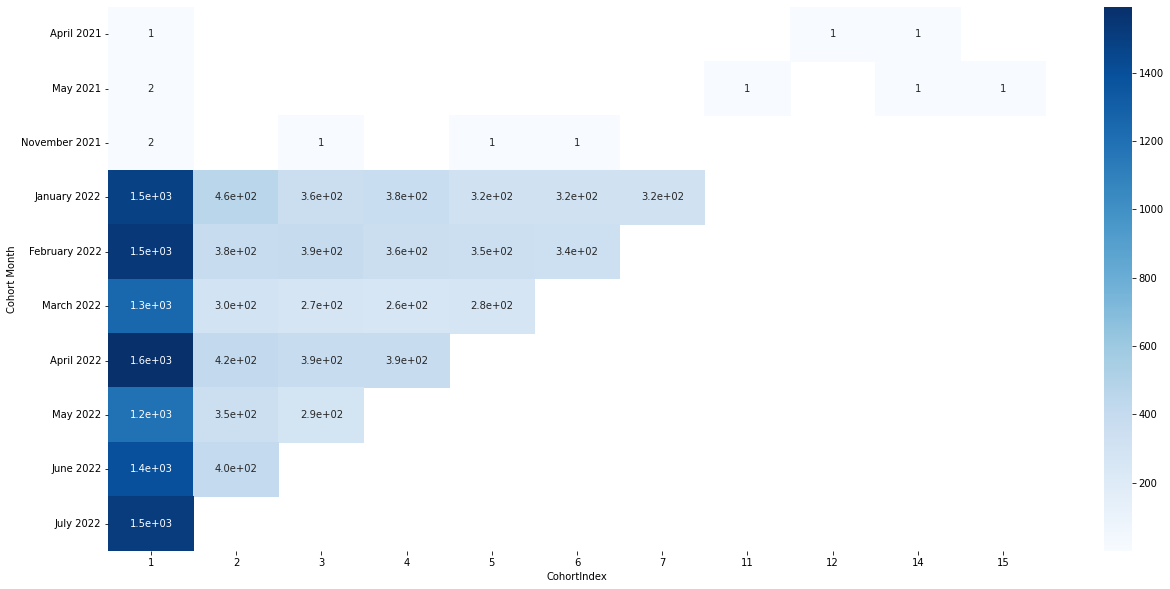

In [96]:
plt.figure(figsize=(21,10))
cohort_table.index = cohort_table.index.strftime('%B %Y')
sns.heatmap(cohort_table,annot=True,cmap='Blues')

In [97]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,11,12,14,15
Cohort Month,,,,,,,,,,,
April 2021,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
May 2021,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,0.5,0.5
November 2021,1.0,NaN,0.500000,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN
January 2022,1.0,0.306506,0.244802,0.253521,0.211938,0.212609,0.217304,NaN,NaN,NaN,NaN
February 2022,1.0,0.250162,0.255361,0.235218,0.230019,0.218973,NaN,NaN,NaN,NaN,NaN
March 2022,1.0,0.243028,0.218327,0.206375,0.219920,NaN,NaN,NaN,NaN,NaN,NaN
April 2022,1.0,0.264447,0.244347,0.245603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
May 2022,1.0,0.295302,0.240772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
June 2022,1.0,0.290115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


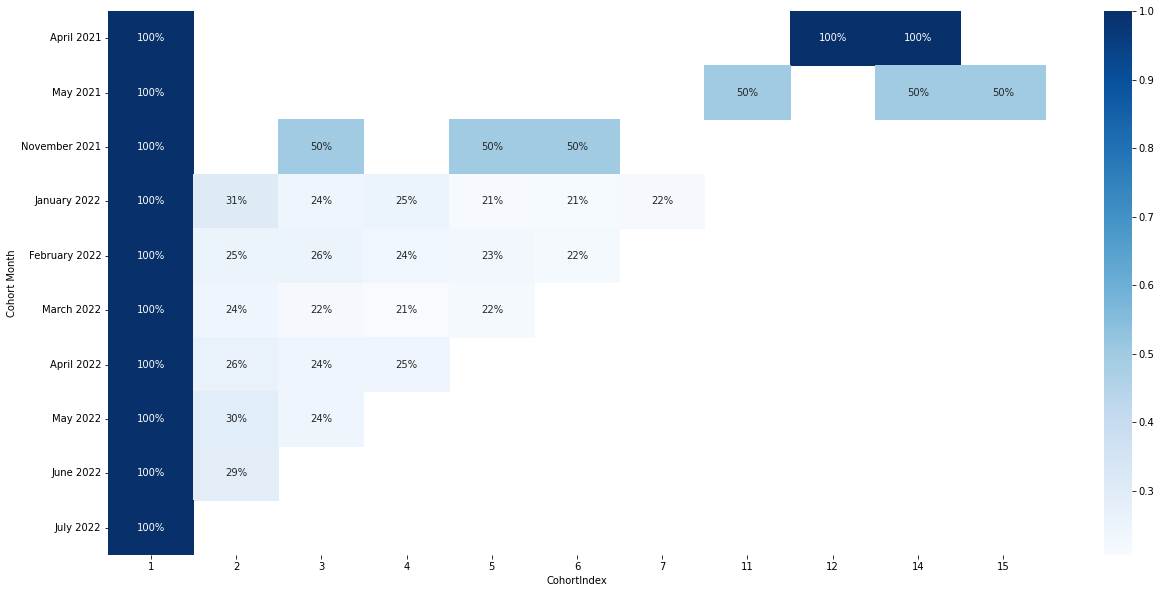

In [98]:
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%',cmap='Blues')

## **Data point analysis to use regressor**

In [99]:
data_points=np.array(new_cohort_table.values.tolist())

In [100]:
data_points[np.isnan(data_points)]=0

In [101]:
data_points[3:8,1]
cohertindex=[1,2,3,4,5]

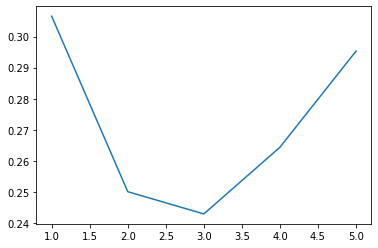

In [102]:
plt.plot(cohertindex,data_points[3:8,1])

## **Polynomial and linear regression**

### **linear regression**

In [103]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit((np.array(cohertindex)).reshape(-1, 1),data_points[3:8,1]);

In [104]:
#y_predict = regressor.predict(np.array([6]).reshape(1, -1))
y_predict = regressor.predict(np.array(cohertindex).reshape(-1, 1))
regressor.intercept_
y_predict

array([0.27351357, 0.27270131, 0.27188906, 0.2710768 , 0.27026454])

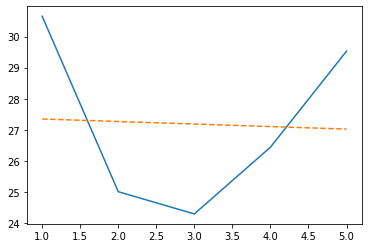

In [105]:
plt.plot(cohertindex,data_points[3:8,1]*100)
plt.plot(np.array(cohertindex),y_predict*100,linestyle = '--')
#plt.scatter(6,y_predict*100)
plt.xlabel='precentaqe'
plt.show()

In [106]:
np.array(cohertindex)

array([1, 2, 3, 4, 5])

# **Train and apply Polynomial Regression**

In [107]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform((np.array(cohertindex)).reshape(-1, 1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, data_points[3:8,1])

LinearRegression()

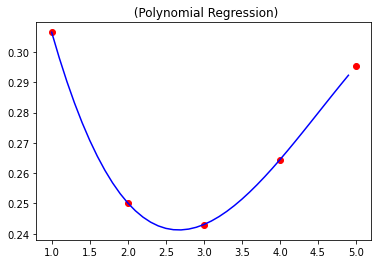

In [108]:
X_grid = np.arange(min((np.array(cohertindex)).reshape(-1,1)), max((np.array(cohertindex)).reshape(-1,1)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter((np.array(cohertindex)).reshape(-1,1), data_points[3:8,1], color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title(' (Polynomial Regression)')
plt.xlabel='months'
plt.ylabel='retention percentage'
plt.show()

In [109]:
lin_reg_2.predict(poly_reg.fit_transform([[6]]))*100

array([31.80100749])

In [110]:
data_points[3:8,1].mean()*100

27.188905641334713

In [111]:
discount = pd.read_csv('/content/Data analyst Task.csv')

In [ ]:
#discount['total_profit']=(discount['discount_cost']+discount['basket'])

In [ ]:
discount['discount_type'] = discount['discount_type'].fillna(0)
print(discount.loc[df['discount_type'] == 2, 'basket'].mean())
print(discount.loc[df['discount_type'] == 1, 'basket'].mean())
print(discount.loc[df['discount_type'] == 0, 'basket'].mean())

32539.492753623188
21771.86827758951
24989.741324778603


<Figure size 1440x720 with 0 Axes>

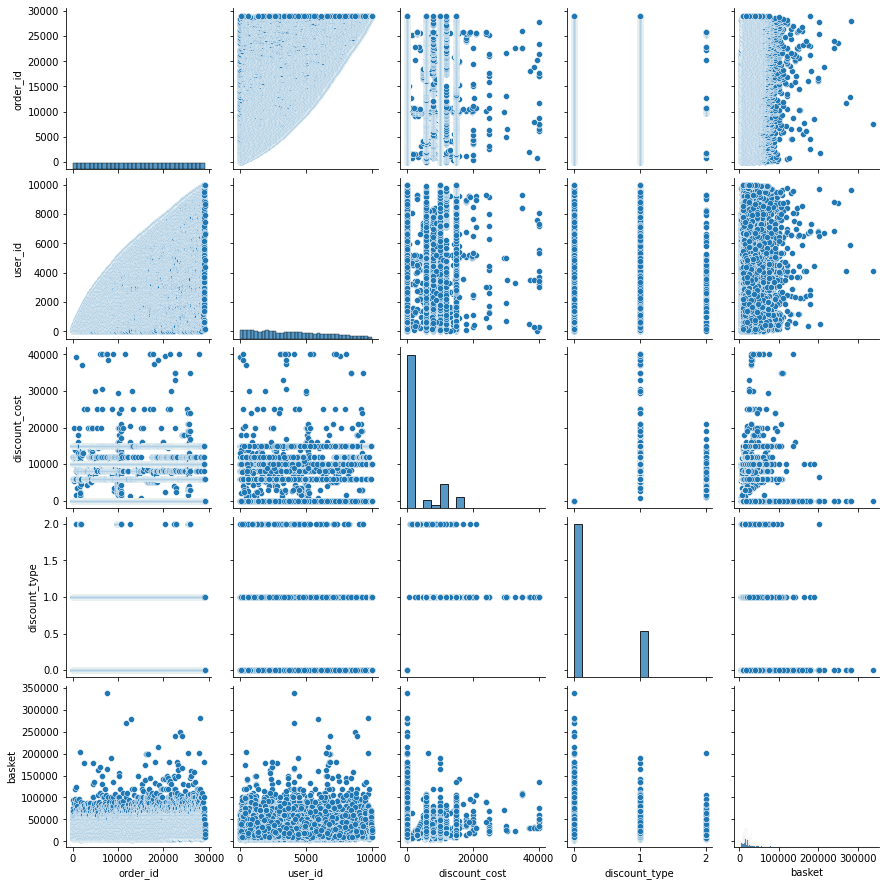

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(discount)

In [112]:
discount

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,7/31/2022,0,NaN,18000
29053,29054,9985,7/31/2022,0,NaN,25000
29054,29055,8843,7/31/2022,6000,1.0,24000
29055,29056,8703,7/31/2022,0,NaN,40000


# **Pre Processing for RFM Analysis**

In [118]:
discount = pd.read_csv('/content/Data analyst Task.csv')

In [119]:
discount['discount_type'] = discount['discount_type'].fillna(0)

In [120]:
discount['created_at']=pd.to_datetime(discount['created_at'])

In [121]:
#Calculate the first and last orders for each user
discount['first order'] =  discount.groupby('user_id')['created_at'].transform('min')
discount['last order'] =  discount.groupby('user_id')['created_at'].transform('max')

In [117]:
discount.head(100)

,order_id,user_id,created_at,discount_cost,discount_type,basket,first order,last order
0,1,1,2021-04-12,10000,1.0,12000,2021-04-12,2022-05-09
1,2,2,2021-05-09,0,0.0,20000,2021-05-09,2022-06-04
2,3,3,2021-05-09,10000,1.0,14000,2021-05-09,2022-07-18
3,4,4,2021-11-10,0,0.0,15000,2021-11-10,2022-04-09
4,5,5,2021-11-10,10000,1.0,16000,2021-11-10,2022-01-18
...,...,...,...,...,...,...,...,...
95,96,95,2022-01-02,15000,1.0,21000,2022-01-02,2022-05-14
96,97,96,2022-01-02,0,0.0,70000,2022-01-02,2022-01-02
97,98,97,2022-01-02,15000,1.0,22000,2022-01-02,2022-01-02
98,99,98,2022-01-02,15000,1.0,20000,2022-01-02,2022-01-02


In [40]:
discount=discount.sort_values(by=['user_id','created_at'])

In [41]:
discount.head(100)

,order_id,user_id,created_at,discount_cost,discount_type,basket,first order,last order
0,1,1,2021-04-12,10000,1.0,12000,2021-04-12,2022-05-09
7703,7704,1,2022-03-28,0,0.0,6400,2021-04-12,2022-05-09
7980,7981,1,2022-03-31,0,0.0,5000,2021-04-12,2022-05-09
13984,13985,1,2022-05-09,0,0.0,6800,2021-04-12,2022-05-09
1,2,2,2021-05-09,0,0.0,20000,2021-05-09,2022-06-04
...,...,...,...,...,...,...,...,...
4879,4880,19,2022-02-28,0,0.0,18000,2022-01-01,2022-07-28
5271,5272,19,2022-03-03,0,0.0,18000,2022-01-01,2022-07-28
6601,6602,19,2022-03-16,0,0.0,30000,2022-01-01,2022-07-28
7499,7500,19,2022-03-26,0,0.0,24000,2022-01-01,2022-07-28


In [42]:
cleaned_data=discount.drop_duplicates(subset=['user_id']) 
#drop people who dont have discount or dont have discount in exactly first order

In [43]:
cleaned_data

,order_id,user_id,created_at,discount_cost,discount_type,basket,first order,last order
0,1,1,2021-04-12,10000,1.0,12000,2021-04-12,2022-05-09
1,2,2,2021-05-09,0,0.0,20000,2021-05-09,2022-06-04
2,3,3,2021-05-09,10000,1.0,14000,2021-05-09,2022-07-18
3,4,4,2021-11-10,0,0.0,15000,2021-11-10,2022-04-09
4,5,5,2021-11-10,10000,1.0,16000,2021-11-10,2022-01-18
...,...,...,...,...,...,...,...,...
29030,29031,9981,2022-07-31,10000,1.0,24000,2022-07-31,2022-07-31
29033,29034,9982,2022-07-31,0,0.0,30000,2022-07-31,2022-07-31
29035,29036,9983,2022-07-31,0,0.0,21000,2022-07-31,2022-07-31
29038,29039,9984,2022-07-31,0,0.0,22000,2022-07-31,2022-07-31


In [44]:
#filter users which use discount

filtered_discount_user=cleaned_data[cleaned_data["discount_type"] != 0]
filtered_discount_user

,order_id,user_id,created_at,discount_cost,discount_type,basket,first order,last order
0,1,1,2021-04-12,10000,1.0,12000,2021-04-12,2022-05-09
2,3,3,2021-05-09,10000,1.0,14000,2021-05-09,2022-07-18
4,5,5,2021-11-10,10000,1.0,16000,2021-11-10,2022-01-18
7,8,8,2022-01-01,10000,1.0,10000,2022-01-01,2022-07-13
10,11,11,2022-01-01,15000,1.0,21000,2022-01-01,2022-02-12
...,...,...,...,...,...,...,...,...
28968,28969,9970,2022-07-31,15000,1.0,20000,2022-07-31,2022-07-31
28970,28971,9971,2022-07-31,15000,1.0,15000,2022-07-31,2022-07-31
28985,28986,9974,2022-07-31,10000,1.0,20000,2022-07-31,2022-07-31
29022,29023,9978,2022-07-31,10000,1.0,24000,2022-07-31,2022-07-31


# **RFM Analysis**

**RFM** (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.



*   RECENCY (R): Days since last purchase
*   FREQUENCY (F): Total number of purchases
*   MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.


**Customer Type 1 (Discount_type 1 and 2 )**

# **Recency**

**To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.**

In [128]:
recency_df = filtered_discount_user.groupby(by='user_id', as_index=False)['created_at'].max()
recency_df.columns = ['user_id','LastPurshaceDate']
recency_df=recency_df.sort_values(by=['user_id'])
recency_df.dtypes

user_id                      int64
LastPurshaceDate    datetime64[ns]
dtype: object

In [129]:
#get current datetime (Timezone)
today=dt.date.today().strftime('%Y-%m-%d')
date_object = dt.datetime.strptime(today, '%Y-%m-%d').date()
print(type(date_object))
print(date_object)
now = dt.date(2022,9,14)


<class 'datetime.date'>
2022-09-15


In [130]:
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (pd.to_datetime(now) - x).days)

In [131]:
recency_df

,user_id,LastPurshaceDate,Recency
0,1,2021-04-12,520
1,3,2021-05-09,493
2,5,2021-11-10,308
3,8,2022-01-01,256
4,11,2022-01-01,256
...,...,...,...
4341,9970,2022-07-31,45
4342,9971,2022-07-31,45
4343,9974,2022-07-31,45
4344,9978,2022-07-31,45


# **Frequency**

Frequency helps us to know how many times a customer purchased from us. To do that we need to check **how many invoices are registered by the same customer**.

In [132]:
discount = pd.read_csv('/content/Data analyst Task.csv')
discount['discount_type'] = discount['discount_type'].fillna(0)
discount['created_at']=pd.to_datetime(discount['created_at'])

In [133]:
frequency_df=discount[discount['user_id'].isin(recency_df['user_id'].tolist())]
frequency_df

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,2021-04-12,10000,1.0,12000
2,3,3,2021-05-09,10000,1.0,14000
4,5,5,2021-11-10,10000,1.0,16000
7,8,8,2022-01-01,10000,1.0,10000
10,11,11,2022-01-01,15000,1.0,21000
...,...,...,...,...,...,...
29034,29035,2683,2022-07-31,0,0.0,21600
29037,29038,8443,2022-07-31,10000,1.0,35000
29039,29040,4163,2022-07-31,0,0.0,50000
29049,29050,4868,2022-07-31,0,0.0,20000


In [134]:
frequency_df = frequency_df.groupby(by=['user_id'], as_index=False)['created_at'].count()
frequency_df.columns = ['user_id','Frequency']
frequency_df

,user_id,Frequency
0,1,4
1,3,4
2,5,2
3,8,3
4,11,3
...,...,...
4341,9970,1
4342,9971,1
4343,9974,1
4344,9978,1


# **Monetary**

Monetary attribute described as **How much money did the customer spent over time**
we will create a new column total cost to have the total price per invoice.

In [135]:
discount = pd.read_csv('/content/Data analyst Task.csv')
discount['discount_type'] = discount['discount_type'].fillna(0)
discount['created_at']=pd.to_datetime(discount['created_at'])
discount=discount[discount['user_id'].isin(recency_df['user_id'].tolist())]

monetary_df = discount.groupby(by='user_id',as_index=False).agg({'basket': 'sum'})
monetary_df.columns = ['user_id','Monetary']
monetary_df.head()

,user_id,Monetary
0,1,30200
1,3,63500
2,5,31500
3,8,67000
4,11,65000


# **Create RFM Table**

In [136]:
#merge recency dataframe with frequency dataframe
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
temp_df = recency_df.merge(frequency_df,on='user_id')
temp_df.head()

,user_id,Recency,Frequency
0,1,520,4
1,3,493,4
2,5,308,2
3,8,256,3
4,11,256,3


In [137]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='user_id')
#use CustomerID as index
rfm_df.set_index('user_id',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
user_id,,,
1,520,4,30200
3,493,4,63500
5,308,2,31500
8,256,3,67000
11,256,3,65000


## **Customer segments with RFM Model**
### **We do the segmentation in 2 different ways**

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [138]:

quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()


{'Recency': {0.25: 99.0, 0.5: 156.0, 0.75: 213.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 14000.0, 0.5: 22500.0, 0.75: 46800.0}}

In [139]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [140]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
user_id,,,,,,
1,520,4,30200,1,4,3
3,493,4,63500,1,4,4
5,308,2,31500,1,3,3
8,256,3,67000,1,4,4
11,256,3,65000,1,4,4


In [141]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
user_id,,,,,,,
1,520,4,30200,1,4,3,143
3,493,4,63500,1,4,4,144
5,308,2,31500,1,3,3,133
8,256,3,67000,1,4,4,144
11,256,3,65000,1,4,4,144


In [142]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
user_id,,,,,,,
8121,83,6,243000,4,4,4,444
7969,86,6,242650,4,4,4,444
8169,82,4,227000,4,4,4,444
7461,98,9,224000,4,4,4,444
8443,76,4,197500,4,4,4,444
8204,81,3,197000,4,4,4,444
8056,84,5,185000,4,4,4,444
8593,74,9,177000,4,4,4,444
8134,82,6,177000,4,4,4,444


In [143]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  87
Loyal Customers:  909
Big Spenders:  1087
Almost Lost:  251
Lost Customers:  268
Lost Cheap Customers:  331


# **Second Procedure**

In [144]:
rfm_df = temp_df.merge(monetary_df,on='user_id')
df.set_index(['user_id'])
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,user_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1,520,4,30200,0.023039,88.391624,88.391624
1,3,493,4,63500,0.046078,88.391624,88.391624
2,5,308,2,31500,0.069116,72.422918,72.422918
3,8,256,3,67000,0.426218,82.708237,82.708237
4,11,256,3,65000,0.426218,82.708237,82.708237


In [145]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df.head(7)

,user_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,1,520,4,30200,0.02,88.39,88.39,3.76
1,3,493,4,63500,0.05,88.39,88.39,3.76
2,5,308,2,31500,0.07,72.42,72.42,3.08
3,8,256,3,67000,0.43,82.71,82.71,3.52
4,11,256,3,65000,0.43,82.71,82.71,3.52
5,12,256,4,48500,0.43,88.39,88.39,3.76
6,14,256,3,37000,0.43,82.71,82.71,3.52


In [146]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['user_id', 'RFM_Score', 'Customer_segment']].head(20)

,user_id,RFM_Score,Customer_segment
0,1,3.76,Medium Value Customer
1,3,3.76,Medium Value Customer
2,5,3.08,Medium Value Customer
3,8,3.52,Medium Value Customer
4,11,3.52,Medium Value Customer
5,12,3.76,Medium Value Customer
6,14,3.52,Medium Value Customer
7,15,1.40,Lost Customers
8,24,3.52,Medium Value Customer
9,25,4.22,High value Customer


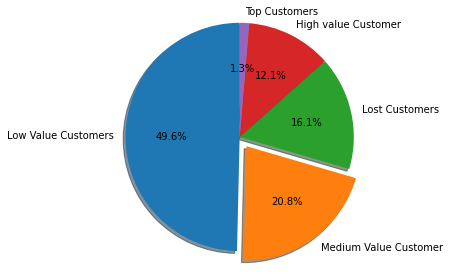

In [148]:
explode = (0, 0.1, 0, 0,0)  
fig1, ax1 = plt.subplots()
ax1.pie(rfm_df.Customer_segment.value_counts(), explode=explode, labels=rfm_df.Customer_segment.value_counts().index, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan'])

ax1.axis('equal')  
plt.tight_layout()
plt.show()

# **RFM Analysis**
## **Customer Type 2 (non_discount)**

In [65]:
discount = pd.read_csv('/content/Data analyst Task.csv')
discount['discount_type'] = discount['discount_type'].fillna(0)
discount['created_at']=pd.to_datetime(discount['created_at'])

discount['first order'] =  discount.groupby('user_id')['created_at'].transform('min')
discount['last order'] =  discount.groupby('user_id')['created_at'].transform('max')
discount=discount.sort_values(by=['user_id','created_at'])
discount

,order_id,user_id,created_at,discount_cost,discount_type,basket,first order,last order
0,1,1,2021-04-12,10000,1.0,12000,2021-04-12,2022-05-09
7703,7704,1,2022-03-28,0,0.0,6400,2021-04-12,2022-05-09
7980,7981,1,2022-03-31,0,0.0,5000,2021-04-12,2022-05-09
13984,13985,1,2022-05-09,0,0.0,6800,2021-04-12,2022-05-09
1,2,2,2021-05-09,0,0.0,20000,2021-05-09,2022-06-04
...,...,...,...,...,...,...,...,...
29030,29031,9981,2022-07-31,10000,1.0,24000,2022-07-31,2022-07-31
29033,29034,9982,2022-07-31,0,0.0,30000,2022-07-31,2022-07-31
29035,29036,9983,2022-07-31,0,0.0,21000,2022-07-31,2022-07-31
29038,29039,9984,2022-07-31,0,0.0,22000,2022-07-31,2022-07-31


In [66]:
temp_df=discount[~discount['user_id'].isin(recency_df['user_id'].tolist())]
#drop people who have discount to filter type 2 users

In [67]:
temp_df

,order_id,user_id,created_at,discount_cost,discount_type,basket,first order,last order
1,2,2,2021-05-09,0,0.0,20000,2021-05-09,2022-06-04
17778,17779,2,2022-06-04,0,0.0,41000,2021-05-09,2022-06-04
3,4,4,2021-11-10,0,0.0,15000,2021-11-10,2022-04-09
6199,6200,4,2022-03-12,0,0.0,27000,2021-11-10,2022-04-09
9115,9116,4,2022-04-09,0,0.0,27600,2021-11-10,2022-04-09
...,...,...,...,...,...,...,...,...
29025,29026,9980,2022-07-31,0,0.0,10000,2022-07-31,2022-07-31
29033,29034,9982,2022-07-31,0,0.0,30000,2022-07-31,2022-07-31
29035,29036,9983,2022-07-31,0,0.0,21000,2022-07-31,2022-07-31
29038,29039,9984,2022-07-31,0,0.0,22000,2022-07-31,2022-07-31


In [68]:
#drop duplications
cleaned_data=temp_df.drop_duplicates(subset=['user_id']) 
cleaned_data

,order_id,user_id,created_at,discount_cost,discount_type,basket,first order,last order
1,2,2,2021-05-09,0,0.0,20000,2021-05-09,2022-06-04
3,4,4,2021-11-10,0,0.0,15000,2021-11-10,2022-04-09
5,6,6,2022-01-01,0,0.0,10000,2022-01-01,2022-04-27
6,7,7,2022-01-01,0,0.0,29500,2022-01-01,2022-07-28
8,9,9,2022-01-01,0,0.0,5000,2022-01-01,2022-04-23
...,...,...,...,...,...,...,...,...
29025,29026,9980,2022-07-31,0,0.0,10000,2022-07-31,2022-07-31
29033,29034,9982,2022-07-31,0,0.0,30000,2022-07-31,2022-07-31
29035,29036,9983,2022-07-31,0,0.0,21000,2022-07-31,2022-07-31
29038,29039,9984,2022-07-31,0,0.0,22000,2022-07-31,2022-07-31


# **Recency**

In [69]:
recency_df_wd = cleaned_data.groupby(by='user_id', as_index=False)['created_at'].max()
recency_df_wd.columns = ['user_id','LastPurshaceDate']
recency_df_wd=recency_df_wd.sort_values(by=['user_id'])
recency_df_wd.dtypes

today=dt.date.today().strftime('%Y-%m-%d')
date_object = dt.datetime.strptime(today, '%Y-%m-%d').date()
print(type(date_object))
print(date_object)
now = dt.date(2022,9,14)

recency_df_wd['Recency'] = recency_df_wd['LastPurshaceDate'].apply(lambda x: (pd.to_datetime(now) - x).days)
recency_df_wd.drop('LastPurshaceDate',axis=1,inplace=True)

<class 'datetime.date'>
2022-09-15


In [70]:
recency_df_wd

,user_id,Recency
0,2,493
1,4,308
2,6,256
3,7,256
4,9,256
...,...,...
5634,9980,45
5635,9982,45
5636,9983,45
5637,9984,45


In [71]:
temp_df
frequency_df = temp_df.groupby(by=['user_id'], as_index=False)['created_at'].count()
frequency_df.columns = ['user_id','Frequency']
frequency_df

,user_id,Frequency
0,2,2
1,4,3
2,6,7
3,7,8
4,9,10
...,...,...
5634,9980,1
5635,9982,1
5636,9983,1
5637,9984,1


In [72]:
discount = pd.read_csv('/content/Data analyst Task.csv')
discount['discount_type'] = discount['discount_type'].fillna(0)
discount['created_at']=pd.to_datetime(discount['created_at'])
discount=discount[~discount['user_id'].isin(recency_df['user_id'].tolist())]

monetary_df = discount.groupby(by='user_id',as_index=False).agg({'basket': 'sum'})
monetary_df.columns = ['user_id','Monetary']
monetary_df

,user_id,Monetary
0,2,61000
1,4,69600
2,6,89925
3,7,246500
4,9,92000
...,...,...
5634,9980,10000
5635,9982,30000
5636,9983,21000
5637,9984,22000


## **Create second table**

In [73]:
#merge recency dataframe with frequency dataframe

temp_df = recency_df_wd.merge(frequency_df,on='user_id')

#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='user_id')
#check the head
rfm_df = temp_df.merge(monetary_df,on='user_id')
df.set_index(['user_id'])
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,user_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,2,493,2,61000,0.017771,56.162440,56.162440
1,4,308,3,69600,0.035543,69.418337,69.418337
2,6,256,7,89925,0.302115,88.091860,88.091860
3,7,256,8,246500,0.302115,90.370633,90.370633
4,9,256,10,92000,0.302115,93.411952,93.411952


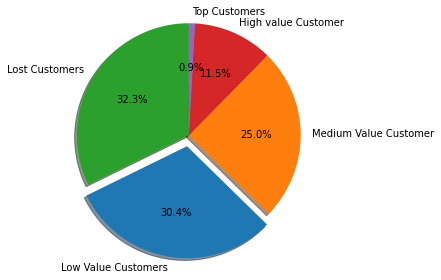

In [78]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['user_id', 'RFM_Score', 'Customer_segment']].head(20)

explode = (0, 0.1, 0, 0,0)  
fig1, ax1 = plt.subplots()
ax1.pie(rfm_df.Customer_segment.value_counts(), explode=explode, labels=rfm_df.Customer_segment.value_counts().index, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['tab:green','tab:blue','tab:orange','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan'])

ax1.axis('equal')  
plt.tight_layout()
plt.show()



# **Question 3**

In [149]:
differentiate = pd.read_csv('/content/Data analyst Task.csv')
differentiate['discount_type'] = differentiate['discount_type'].fillna(0)
differentiate['created_at']=pd.to_datetime(differentiate['created_at'])

In [150]:
differentiate=differentiate.sort_values(by=['user_id','created_at'])
differentiate

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,2021-04-12,10000,1.0,12000
7703,7704,1,2022-03-28,0,0.0,6400
7980,7981,1,2022-03-31,0,0.0,5000
13984,13985,1,2022-05-09,0,0.0,6800
1,2,2,2021-05-09,0,0.0,20000
...,...,...,...,...,...,...
29030,29031,9981,2022-07-31,10000,1.0,24000
29033,29034,9982,2022-07-31,0,0.0,30000
29035,29036,9983,2022-07-31,0,0.0,21000
29038,29039,9984,2022-07-31,0,0.0,22000


In [151]:
differentiate=differentiate[differentiate.duplicated(subset=['user_id'], keep=False)]
differentiate=differentiate.sort_values(['user_id','created_at'])
#differentiate['diff_line_race'] = differentiate['created_at'] - differentiate['created_at'].shift(1)
differentiate['NextOrder'] = differentiate.groupby(['user_id']).shift(-1)['created_at']
differentiate['difference']=differentiate['NextOrder'].subtract(differentiate['created_at'])
differentiate.head(13)

,order_id,user_id,created_at,discount_cost,discount_type,basket,NextOrder,difference
0,1,1,2021-04-12,10000,1.0,12000,2022-03-28,350 days
7703,7704,1,2022-03-28,0,0.0,6400,2022-03-31,3 days
7980,7981,1,2022-03-31,0,0.0,5000,2022-05-09,39 days
13984,13985,1,2022-05-09,0,0.0,6800,NaT,NaT
1,2,2,2021-05-09,0,0.0,20000,2022-06-04,391 days
17778,17779,2,2022-06-04,0,0.0,41000,NaT,NaT
2,3,3,2021-05-09,10000,1.0,14000,2022-03-28,323 days
7712,7713,3,2022-03-28,0,0.0,18000,2022-07-17,111 days
26085,26086,3,2022-07-17,0,0.0,18000,2022-07-18,1 days
26302,26303,3,2022-07-18,0,0.0,13500,NaT,NaT


In [152]:
differentiate['difference'].mean()

Timedelta('17 days 18:27:33.523489933')

In [153]:
differentiate.describe()

,order_id,user_id,discount_cost,discount_type,basket,difference
count,23516.000000,23516.000000,23516.000000,23516.000000,23516.000000,19072
mean,14808.290356,3622.431961,1705.659551,0.178006,24991.429112,17 days 18:27:33.523489933
std,8219.211363,2476.232700,4097.545955,0.395427,17190.088625,25 days 04:02:44.058521249
min,1.000000,1.000000,0.000000,0.000000,4000.000000,0 days 00:00:00
25%,7840.750000,1495.000000,0.000000,0.000000,14000.000000,4 days 00:00:00
50%,14885.500000,3276.000000,0.000000,0.000000,20000.000000,8 days 00:00:00
75%,21824.250000,5420.000000,0.000000,0.000000,30000.000000,21 days 00:00:00
max,29057.000000,9940.000000,40000.000000,2.000000,337500.000000,391 days 00:00:00


In [154]:
#data preprocessing 
differentiate['difference']=differentiate['difference'].dt.days
differentiate['difference'] = differentiate['difference'].fillna(0)

In [155]:
differentiate=differentiate.loc[differentiate['difference'] != 0]
differentiate

,order_id,user_id,created_at,discount_cost,discount_type,basket,NextOrder,difference
0,1,1,2021-04-12,10000,1.0,12000,2022-03-28,350.0
7703,7704,1,2022-03-28,0,0.0,6400,2022-03-31,3.0
7980,7981,1,2022-03-31,0,0.0,5000,2022-05-09,39.0
1,2,2,2021-05-09,0,0.0,20000,2022-06-04,391.0
2,3,3,2021-05-09,10000,1.0,14000,2022-03-28,323.0
...,...,...,...,...,...,...,...,...
28696,28697,9835,2022-07-30,0,0.0,10000,2022-07-31,1.0
28316,28317,9836,2022-07-28,15000,1.0,18000,2022-07-30,2.0
28327,28328,9840,2022-07-28,0,0.0,24000,2022-07-30,2.0
28348,28349,9847,2022-07-28,0,0.0,16000,2022-07-31,3.0


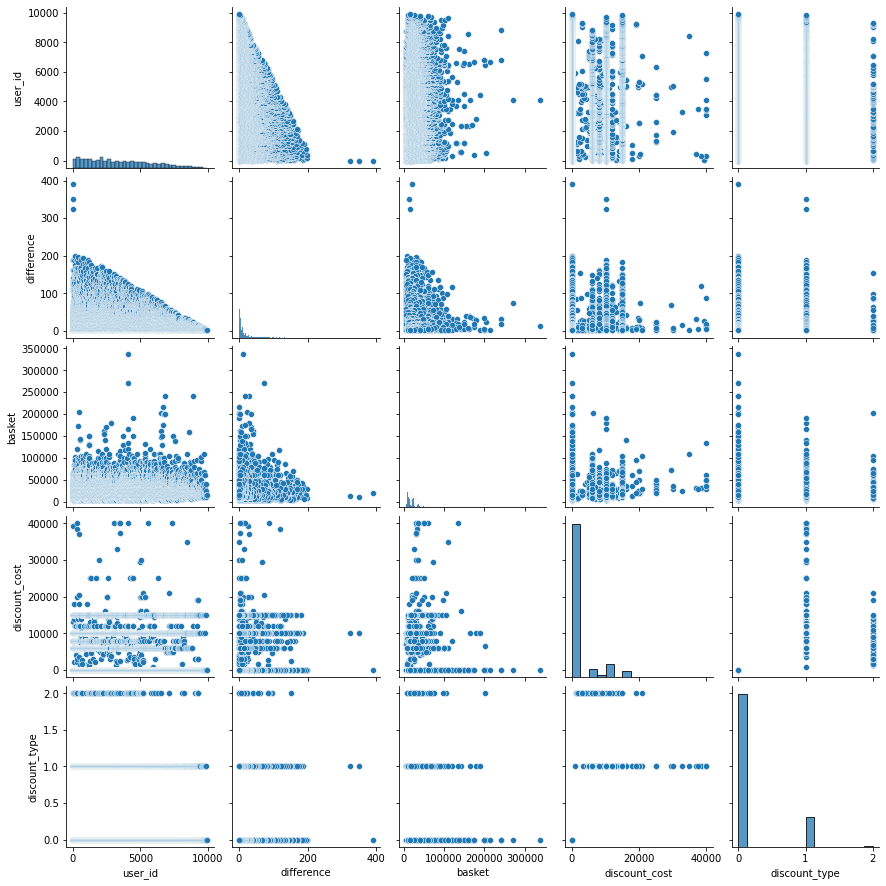

In [156]:
sns.pairplot(differentiate[['user_id','difference','basket','discount_cost','discount_type']])

# **Implement a Kmeans clustering algorithm**

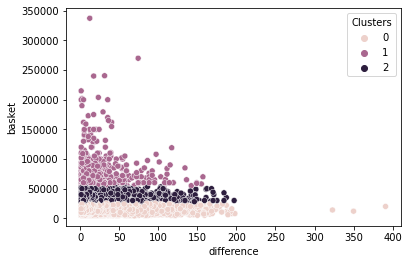

In [157]:
import sklearn.cluster as cluster
# use 3 cluster
kmeans = cluster.KMeans(n_clusters=3 ,init="k-means++")
kmeans = kmeans.fit(differentiate[['difference','basket']])
differentiate['Clusters'] = kmeans.labels_


sns.scatterplot(x="difference", y="basket",hue = 'Clusters',  data=differentiate)

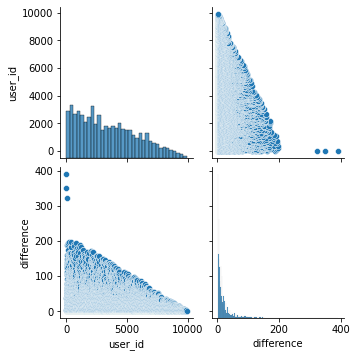

In [159]:
sns.pairplot(differentiate[['user_id','difference']])